In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('california_housing_train.csv')

In [22]:
def get_stdev(column, mean, count):
    var = 0
    for item in column:
        var += (mean-item)**2
    var = var / (count - 1)
    return var**0.5

def get_column_stat(column, name_column):
    count = 0
    max_value = -10**20
    min_value = 10**20
    sum_value = 0
    
    for item in column:
        count += 1
        if max_value < item:
            max_value = item
        if min_value > item:
            min_value = item
        sum_value += item

    mean = sum_value / count
    stdev = get_stdev(column, mean, count)
    
    sorted_column = sorted(column)
    quantile_25 = sorted_column[int(0.25 * count)]
    quantile_50 = sorted_column[int(0.5 * count)]  # медиана
    quantile_75 = sorted_column[int(0.75 * count)]
    
    print("Статистика по столбцу", name_column)
    print("Количество:", count)
    print("Максимальное значение:", max_value)
    print("Среднее значение:", mean)
    print("Минимальное значение:", min_value)
    print("Стандартное отклонение: ±" + str(stdev))
    print("25% квантиль:", quantile_25)
    print("50% квантиль (медиана):", quantile_50)
    print("75% квантиль:", quantile_75)
    
    return {
        'count': count,
        'mean': mean,
        'std': stdev,
        'min': min_value,
        'max': max_value,
        'q25': quantile_25,
        'q50': quantile_50,
        'q75': quantile_75
    }

Статистика по столбцу longitude
Количество: 17000
Максимальное значение: -114.31
Среднее значение: -119.56210823529375
Минимальное значение: -124.35
Стандартное отклонение: ±2.005166408426173
25% квантиль: -121.79
50% квантиль (медиана): -118.49
75% квантиль: -118.0

Статистика по столбцу latitude
Количество: 17000
Максимальное значение: 41.95
Среднее значение: 35.6252247058827
Минимальное значение: 32.54
Стандартное отклонение: ±2.1373397946570734
25% квантиль: 33.93
50% квантиль (медиана): 34.25
75% квантиль: 37.72

Статистика по столбцу housing_median_age
Количество: 17000
Максимальное значение: 52.0
Среднее значение: 28.58935294117647
Минимальное значение: 1.0
Стандартное отклонение: ±12.586936981660335
25% квантиль: 18.0
50% квантиль (медиана): 29.0
75% квантиль: 37.0

Статистика по столбцу total_rooms
Количество: 17000
Максимальное значение: 37937.0
Среднее значение: 2643.664411764706
Минимальное значение: 2.0
Стандартное отклонение: ±2179.947071452768
25% квантиль: 1462.0
50% кв

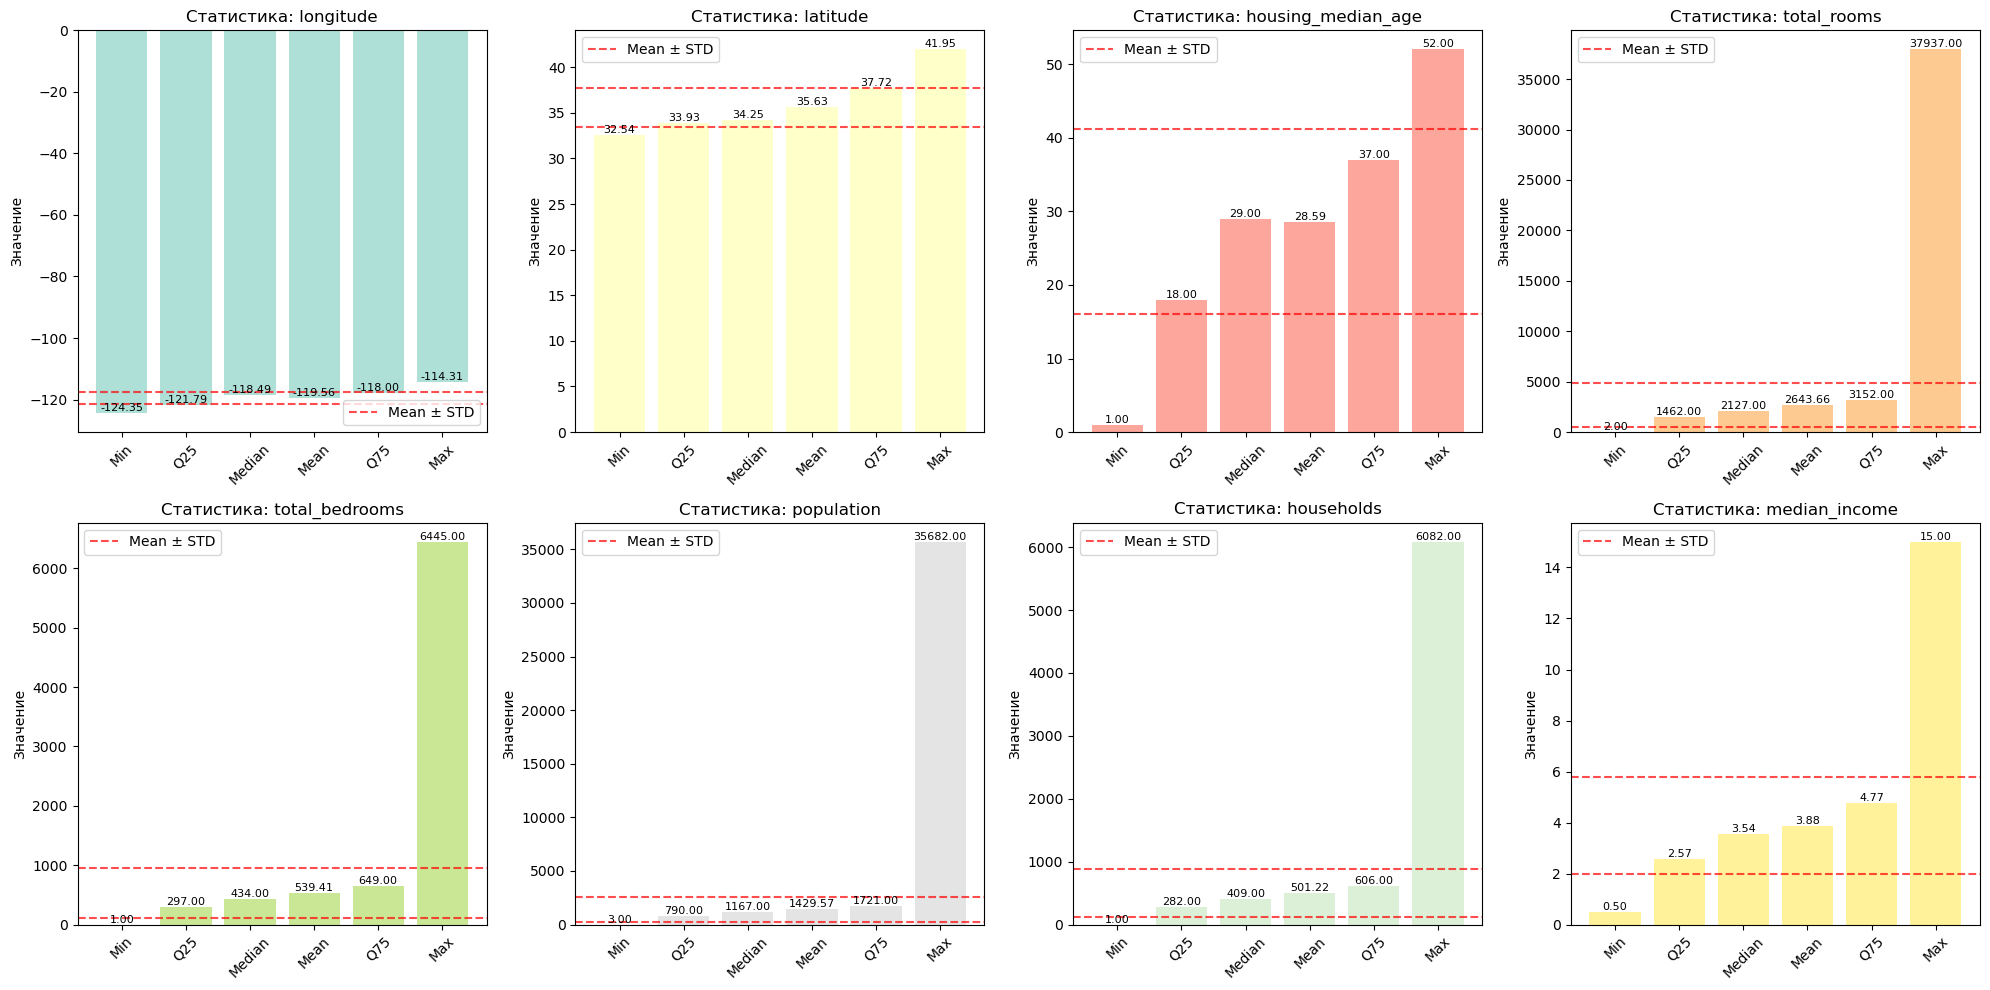

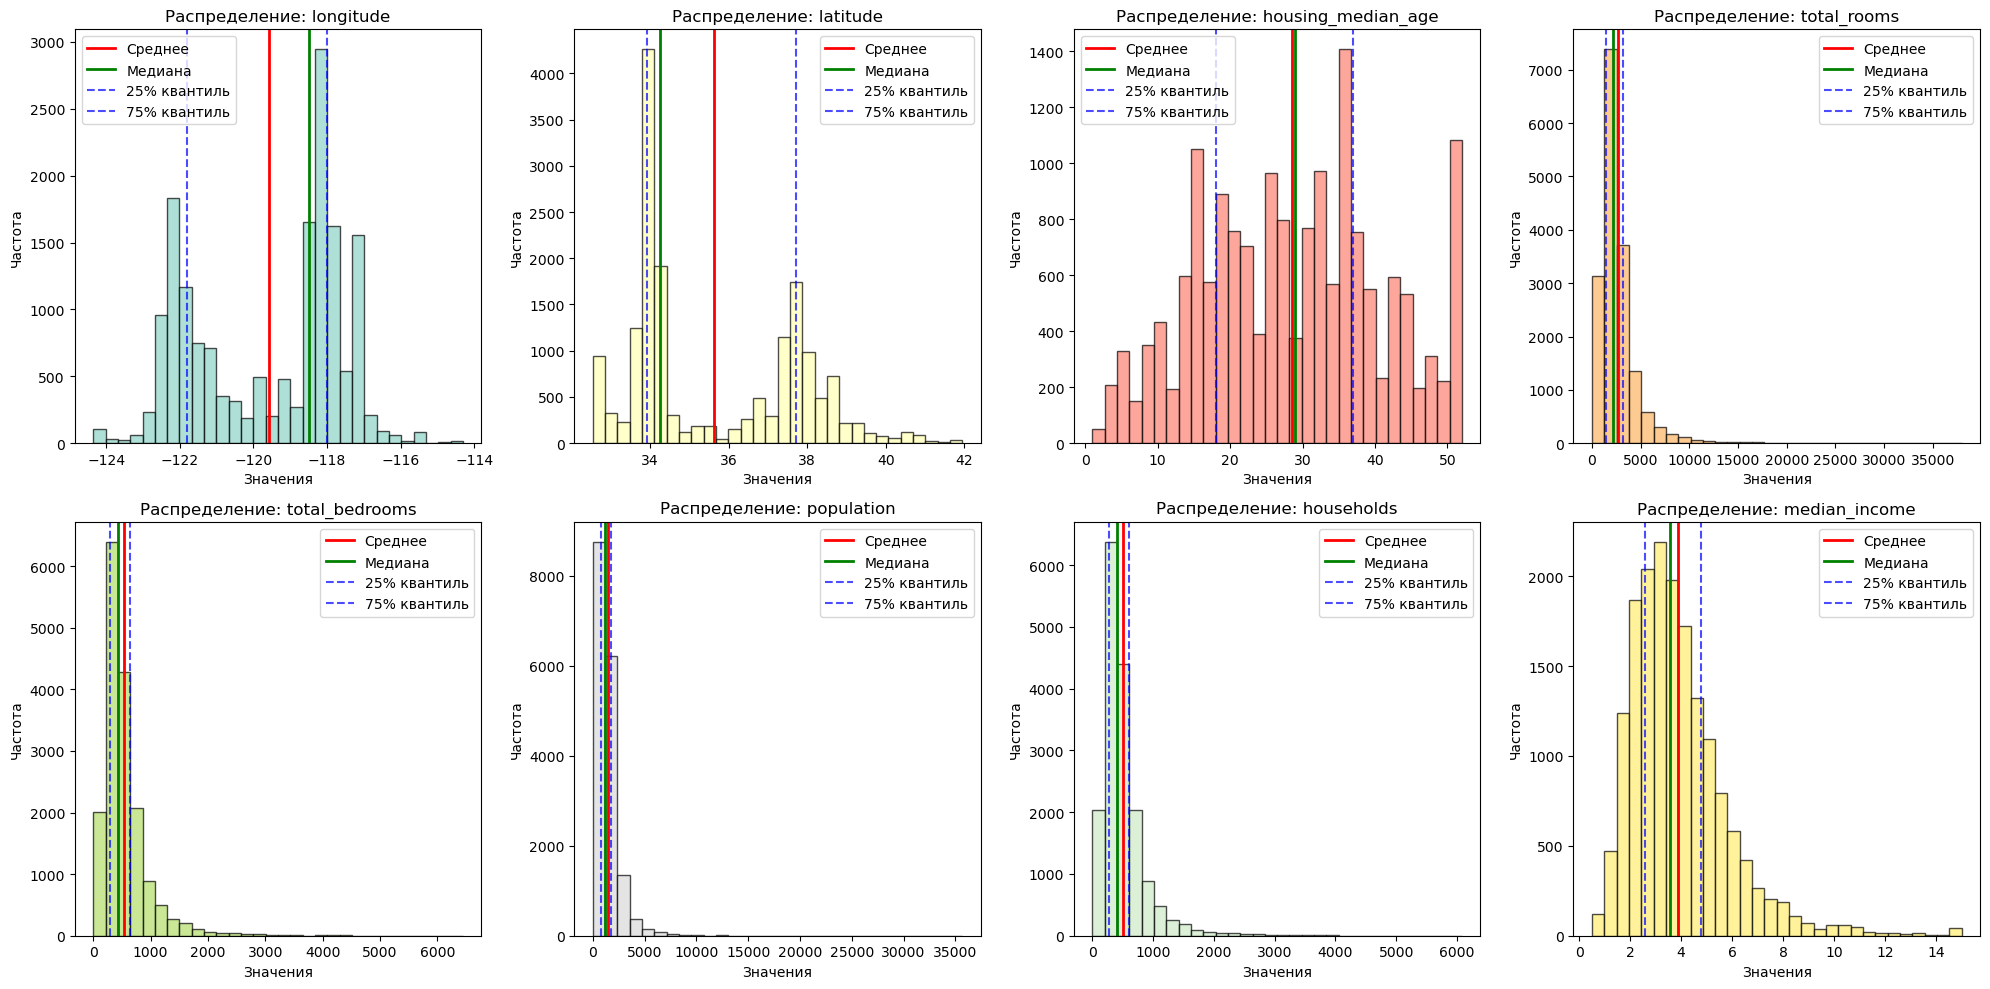

In [23]:
def visualize_statistics(stats_dict):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.ravel()
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(stats_dict)))
    
    for i, (col_name, stats) in enumerate(stats_dict.items()):
        metrics = ['Min', 'Q25', 'Median', 'Mean', 'Q75', 'Max']
        values = [stats['min'], stats['q25'], stats['q50'], 
                 stats['mean'], stats['q75'], stats['max']]
        
        bars = axes[i].bar(metrics, values, color=colors[i], alpha=0.7)
        axes[i].set_title(f'Статистика: {col_name}')
        axes[i].set_ylabel('Значение')
        
        for bar, value in zip(bars, values):
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height,
                        f'{value:.2f}', ha='center', va='bottom', fontsize=8)
        
        axes[i].axhline(y=stats['mean'] + stats['std'], color='red', 
                       linestyle='--', alpha=0.7, label='Mean ± STD')
        axes[i].axhline(y=stats['mean'] - stats['std'], color='red', 
                       linestyle='--', alpha=0.7)
        axes[i].legend()
        
        plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.ravel()
    
    for i, (col_name, stats) in enumerate(stats_dict.items()):
        axes[i].hist(df[col_name], bins=30, alpha=0.7, color=colors[i], 
                    edgecolor='black')
        axes[i].set_title(f'Распределение: {col_name}')
        axes[i].set_xlabel('Значения')
        axes[i].set_ylabel('Частота')
        
        axes[i].axvline(stats['mean'], color='red', linestyle='-', 
                       linewidth=2, label='Среднее')
        axes[i].axvline(stats['q50'], color='green', linestyle='-', 
                       linewidth=2, label='Медиана')
        axes[i].axvline(stats['q25'], color='blue', linestyle='--', 
                       alpha=0.7, label='25% квантиль')
        axes[i].axvline(stats['q75'], color='blue', linestyle='--', 
                       alpha=0.7, label='75% квантиль')
        axes[i].legend()
    
    plt.tight_layout()
    plt.show()

def get_stat():
    dictionary = {
        "longitude": df["longitude"],
        "latitude": df["latitude"],
        "housing_median_age": df["housing_median_age"],
        "total_rooms": df["total_rooms"],
        "total_bedrooms": df["total_bedrooms"],
        "population": df["population"],
        "households": df["households"],
        "median_income": df["median_income"]
    }
    
    stats_dict = {}
    
    for key, value in dictionary.items():
        print("=" * 50)
        stats_dict[key] = get_column_stat(value, key)
        print("=" * 50)
        print()
    
    # Визуализируем статистику
    visualize_statistics(stats_dict)

get_stat()